#Your first Recurrent Neural Network (RNN)
##Nikolaos Kordalis

üôå Welcome to RNNs! After using CNNs in the previous lesson to deal with images (spatial data), you are going to deal with time-related data (***temporal data***).

üéØ Goals of this warm-up challenge:
1. Understand what temporal data is
2. Build your first Recurrent Neural Network



# A Note on Google Colab

From now on, you no longer need to use Google Colab. There will be **no performance gains** from using it, as today's machines are powerful enough as it is ‚Äî especially if you're on a MacBook with an MX chip! üòâ

Proceed with the challenge as you normally would.

Good luck! üöÄ

## (1) The dataset

üî¢ Imagine that we have access to some data about employees in a company.

In [1]:
import numpy as np

X = np.load('X.npy')
y = np.load('y.npy')

In [2]:
X.shape, y.shape

((25000, 10, 3), (25000,))


X.shape = (n_SEQUENCES =25000, n_OBSERVATIONS = 10, n_FEATURES =3)

‚òùÔ∏è The dataset describes the evolution of the **employment status of 25 000 employees, year after year**: each sequence corresponds to 10 consecutive years, where each year describes a job situation, comprising 3 components
- the salary,
- the number of people under someone's responsibility,
- the size of the company. 

üïµüèª To understand the dataset a bit better, let's look at the data of the first employee.

In [3]:
import pandas as pd

employee_0 = pd.DataFrame(X[24999],
                          columns=['salary',
                                   'responsibility',
                                   'company_size'])
round(employee_0,2)

salary  responsibility  company_size
0    0.80            21.0          22.0
1    3.45            21.0           1.0
2    3.51             0.0           1.0
3    1.64             0.0           1.0
4    1.75             0.0           1.0
5    1.84             0.0           2.0
6    2.05             0.0           2.0
7    2.14             0.0           2.0
8    2.27             0.0           1.0
9    2.37             0.0           1.0

üéØ The goal in this challenge is to predict the montly salary on the 11th year for each of these 25,000 employees, based on the past observations.

In [4]:
# For example, the first employee earns 6.499 k USD per month
# during the 11th year at the company
y[0]

6.499

üìà To help you get a better understanding about the evolution of the salaries, the number of people under their responsibility and the company size over the years, you can run the cell down below. Can you visually detect some correlations between these three variables?

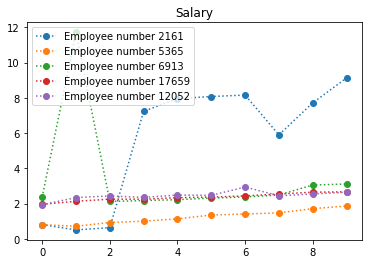

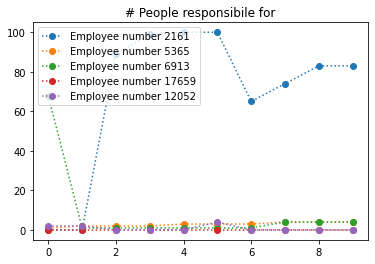

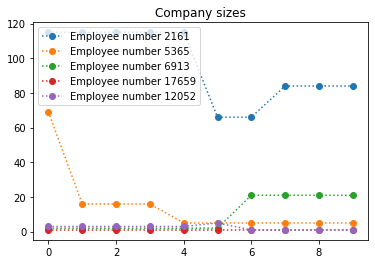

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

number_of_employees = len(X)
number_of_randomly_selected_employees = 5

random_selection = np.random.randint(0, 
                                     number_of_employees,
                                     number_of_randomly_selected_employees)

# As the employees are selected randomly, feel free to re-run this cell a few times !

plt.title('Salary')

for r in random_selection:
    plt.plot(X[r, :, 0],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('# People responsibile for')
for r in random_selection:
    plt.plot(X[r, :, 1],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

‚ùì **Question** ‚ùì Plot the distribution of:
* all the salaries during the 10th year, 
* people under someone's responsibility, 
* and the company sizes 

to get a better understanding of the variability of observations

/home/nikkord/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


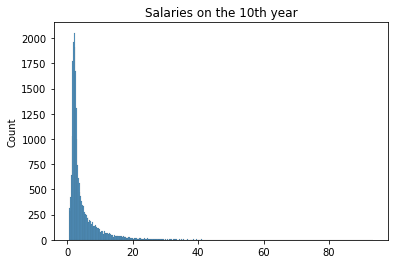

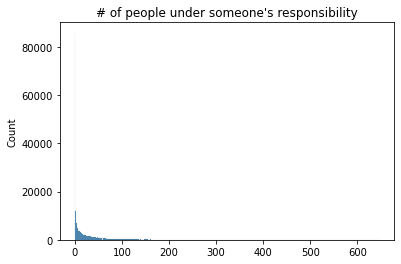

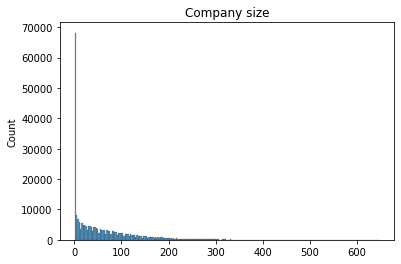

In [6]:
import seaborn as sns

plt.title("Salaries on the 10th year")
sns.histplot(X[:, -1, 0].flatten()) # all the employees, last year, feature #0 = salaries
plt.show()

plt.title("# of people under someone's responsibility")
sns.histplot(X[:, :, 1].flatten()) # all the employees, all the years, feature #1 = responsabilities
plt.show()

plt.title("Company size")
sns.histplot(X[:, :, 2].flatten()) # all the employees, all the years, feature #2 = company size
plt.show()

‚ùì **Question** ‚ùì  Split your dataset between a train and test set (80/20)

In [8]:
 from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## (2) A Simple RNN

ü§ó Now that you are familiar with this company's dataset, you will create your first Recurrent Neural Network. Let's start with a simple architecture.

‚ùì **Question** ‚ùì Write a model that has: 
- a ***Normalization*** layer adapted to the training set
- a ***SimpleRNN*** layer with 20 *units* (don't forget that `tanh` is better suited as an activation function for a Recurrent Layer)
- a ***Dense*** layer with 10 neurons
- a ***Dense*** layer specific to your task (= to ***predict*** a salary)

üë©üèª‚Äçüè´ <u>Remember</u>: You don't need to specify an `input_shape`: as soon as your Normalizer has been adapted to your train set, it has memorized the input shape!

In [9]:
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten
# from tensorflow.keras import layers

2024-01-15 11:40:21.287927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-15 11:40:21.287973: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
model = Sequential()

normalization_layer =Normalization()
normalization_layer.adapt(X_train)

model.add(normalization_layer)
model.add(SimpleRNN(units=20, activation='tanh', input_shape=(10,3)))
model.add(Dense(10, activation="relu"))

model.add(Dense(1, activation="linear"))

2024-01-15 11:40:30.900549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-15 11:40:30.900613: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-15 11:40:30.900636: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-93FH710P): /proc/driver/nvidia/version does not exist
2024-01-15 11:40:30.900902: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


‚ùì **Question**: How many trainable parameters does your RNN have ‚ùì

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, None, 3)          7         
 n)                                                              
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                480       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 708
Trainable params: 701
Non-trainable params: 7
_________________________________________________________________


‚ùì **Question** ‚ùì Try to recompute the number of parameters manually.


parameters  = 20 * ((3+20)+1)
parameters

‚ùì **Question** ‚ùì Compile your model. For RNN, we recommend you to use the ***rmsprop*** optimizer (instead of *adam*).

In [12]:
def compile_model(model):
    model.compile(loss='mse',
                  optimizer='rmsprop', 
                  metrics=['mae'])
    return model

model = compile_model(model)

‚ùì **Questions** ‚ùì 

* Train your model on your training dataset:
    * use a Validation Split of 20%
    * and an Early Stopping Criterion with patience $= 5 $
* Evaluate your performance on the test set

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/100
1000/1000 [==============================] - 3s 3ms/step - loss: 7.8124 - mae: 1.0039 - val_loss: 1.2861 - val_mae: 0.4665
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5935 - mae: 0.4470 - val_loss: 0.8216 - val_mae: 0.3566
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1528 - mae: 0.3983 - val_loss: 0.7252 - val_mae: 0.3554
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9891 - mae: 0.3781 - val_loss: 0.6035 - val_mae: 0.3189
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8768 - mae: 0.3680 - val_loss: 0.6422 - val_mae: 0.4236
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7906 - mae: 0.3634 - val_loss: 0.5524 - val_mae: 0.2912
Epoch 7/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7625 - mae: 0.3615 - val_loss: 0.5703 - val_mae: 0.3350
Epoch 8/100
1000/1000 [==============================] 

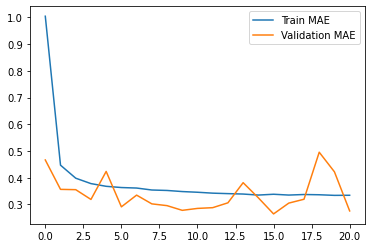

In [29]:
plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

In [17]:
model_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Mean Absolute Error {model_mae[1]:.4f}')

Model Mean Absolute Error 0.2563


In [30]:
# Assuming you have a set of data for which you want predictions (e.g., X_test)
predictions = model.predict(X_test)

# 'predictions' now contains the model's predicted salaries for the 11th year


In [31]:
predictions

array([[2.2946732],
       [2.1460714],
       [9.646759 ],
       ...,
       [3.4511018],
       [1.9500704],
       [2.2482586]], dtype=float32)

## (3) Baseline comparison

‚ùóÔ∏è **Important Reminder** ‚ùóÔ∏è: Always remember to compare your Deep Learning models, and more generally any Machine Learning model, to a baseline. 

üßëüèª‚Äçüè´ Remember that our goal is to predict the salary of the employees for the 11th year. It is a ***Regression Task***. What baseline could we build? 
1. In the case of a traditional regression model, a baseline prediction for `y_test` is  to **predict the average of `y_train`**... but this option could be irrelevant for time-related series. Theoretically, someone's salary is supposed to increase over the years!
2. An alternative baseline prediction for a regression task is to **predict the last seen value**

‚ùì **Questions** ‚ùì 
* Compute the Mean Absolute Error of a baseline model that predicts that the salary remains constant between the 10-th and 11-th year
* Compare this baseline model to your RNN

In [18]:
def constant_prediction(X, y):
    errors = []
    for xx, yy in zip(X, y):
        last_salary = xx[-1][0]        # Using the 10th salary to predict the 11th salary
        errors.append(yy - last_salary)
        
    return errors

errors_baseline = constant_prediction(X, y)
mae_baseline = np.mean(np.abs(errors_baseline))

print(f'Baseline MAE = {mae_baseline:.3f}')
print("vs.")
print(f'RNN MAE = {model_mae[1]:.3f}')

Baseline MAE = 0.595
vs.
RNN MAE = 0.256


In [21]:
# from sklearn.metrics import mean_absolute_error
# X[:,9,0].shape
# y_pred_last = X[:,9,0]
# y_pred_last

(25000,)

In [118]:
# Baseline model
mean_absolute_error(y,y_pred_last)

0.5951943998979569

In [119]:
# Our model
model.evaluate(X_test,y_test)

157/157 [==============================] - 1s 3ms/step - loss: 0.6365 - mae: 0.2782


[0.6364935636520386, 0.2782015800476074]

üòÅ You should notice that your RNN performs a bit better than a baseline model.

## (4) LSTM: Long-Short Term Memory

‚ùì **Questions** ‚ùì 

* Write the exact same model, but with a `LSTM` layer instead of a `SimpleRNN` layer
* Evaluate your performance on the test set

In [22]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

model_lstm = Sequential()

# normalization_layer =Normalization()
# normalization_layer.adapt(X_train)   same as above

model_lstm.add(normalization_layer)
model_lstm.add(LSTM(units=20, activation="tanh"))  #input_shape=(10,3)?
model_lstm.add(Dense(10, activation="relu"))
model_lstm.add(Dense(1, activation="linear"))

model_lstm.compile(loss="mse",
                   optimizer="rmsprop",
                   metrics=["mae"])



In [23]:
es = EarlyStopping(patience=5, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es],
              verbose=1)

Epoch 1/100
1000/1000 [==============================] - 5s 4ms/step - loss: 15.8288 - mae: 1.6839 - val_loss: 2.9070 - val_mae: 0.6806
Epoch 2/100
1000/1000 [==============================] - 4s 4ms/step - loss: 2.5412 - mae: 0.4897 - val_loss: 0.9327 - val_mae: 0.3165
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2767 - mae: 0.3543 - val_loss: 0.7087 - val_mae: 0.3006
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0070 - mae: 0.3309 - val_loss: 0.6021 - val_mae: 0.2966
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8746 - mae: 0.3178 - val_loss: 0.5715 - val_mae: 0.2746
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7950 - mae: 0.3108 - val_loss: 0.5646 - val_mae: 0.3027
Epoch 7/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7500 - mae: 0.3065 - val_loss: 0.5572 - val_mae: 0.2758
Epoch 8/100
1000/1000 [==============================]

In [24]:
# plt.plot(history_LSTM.history["mae"])
# plt.plot(history_LSTM.history["val_mae"])

In [25]:
lstm_mae = model_lstm.evaluate(X_test,y_test)

157/157 [==============================] - 1s 2ms/step - loss: 0.5876 - mae: 0.2585


In [26]:
print(f'Baseline MAE = {mae_baseline:.3f}')
print("vs.")
print(f'RNN MAE = {model_mae[1]:.3f}')
print("vs.")
print(f'LSTM MAE = {lstm_mae[1]:.3f}')

Baseline MAE = 0.595
vs.
RNN MAE = 0.256
vs.
LSTM MAE = 0.258


üí™ The LSTM should perform a bit better than the SimpleRNN with a lower MAE.

üèÅ Congratulations! You know how to train a RNN on sequential data.
 

üíæ Do not forget to git add/commit/push your notebook...

üöÄ ... and move to the next challenge!

---

<u>Note</u>: The sequences you worked with are totally fake. In case, you need to train and reproduce similar data, you can find below the functions that have been used to simulate such a dataset.

## (Utils)

In [27]:
def create_sequences(number):
    X, y = [], []
    
    for i in range(number):
        x_i, y_i = create_individual_sequence(10)
        X.append(x_i)
        y.append(y_i)
        
    return np.array(X), np.array(y)
            
def create_individual_sequence(length):
    company_sizes = []
    nb_persons = []
    salaries = []
    
    
    # Education level
    educ_level = [max(0, int(np.random.normal(10, 2)))]*length
    
    # Company size
    current_size = int(1 + np.random.beta(.4, 4)*500)
    for i in range(length):
        if not np.random.randint(4): # Change 1 out of 3 possibilities 
            current_size = int(max(1, np.random.normal(current_size, 50)))
        company_sizes.append(current_size)
    
    # Number of persons
    nb_iter = np.random.beta(.15, 4)*300
    for i in range(length):
        if not np.random.randint(2): # Change 1 out of 2 possibilities
            R_1 = np.random.beta(0.5, 8)*3
            nb_iter = nb_iter + max(-2, R_1*company_sizes[i] + np.random.randint(-2, 2))
            nb_iter = max(0, nb_iter)
            nb_iter = int(min(company_sizes[i]-1, nb_iter))
        nb_persons.append(nb_iter)
        
    
    # Salary
    salary_iter = max(800, int(np.random.normal(1200, 300)+ 0.05*company_sizes[0] +  np.random.normal(40, 400)))
    salaries.append(salary_iter)
    for i in range(1, length + 1):
        R_1 = np.random.normal(100, 50)
        change_person = nb_persons[i-1] - nb_persons[i-2]
        change_company = max(0, company_sizes[i-1] - company_sizes[i-2])
        salary_iter = salary_iter + 0.05*change_company + change_person*R_1 + np.random.normal(100, 50)
        salary_iter = max(int(salary_iter), 500)
        
        salaries.append(salary_iter)

    y = salaries[-1]/1000
    salaries = [_/1000 for _ in salaries[:-1]]
    
    return np.array([salaries, nb_persons, company_sizes]).T, y

In [28]:
#X, y = create_sequences(25000)

#np.save('X', X.astype(np.float32))
#np.save('y', y)